12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485

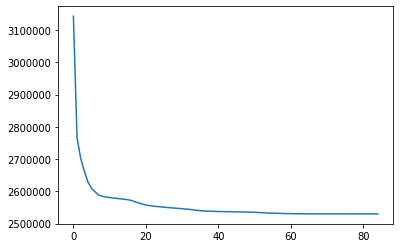

2530026.5658991365


In [3]:
# CS 181, Spring 2020
# Homework 4

import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from seaborn import heatmap
from random import randint

# Loading the MNIST images
large_dataset = np.load("data/large_dataset.npy")

class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K

    def closest_centroid(self, point):
        return np.argmin([distance.euclidean(point, centroid) for centroid in self.centroids])
    
    def centroid_changing(self):
        for i,centroid in enumerate(self.centroids):
            if any(centroid!=self.previous_centroids[i]):
                return True
        return False
    
    def RSS(self):
        return np.sum([np.sum([np.square(datum-self.centroids[i]) for datum in cluster]) 
                for i,cluster in enumerate(self.clusters)])/(self.X.shape[0])            
        
    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        self.X= X
#         randomly initialize K centroids -> k centroid
        self.centroids=[self.X[randint(0,len(self.X))] for i in range(self.K)]

        iteration=0
        RSSs=[]
#         loop: (till all the centroids are stable)
        while iteration==0 or self.centroid_changing():
            self.clusters=[[] for i in range(self.K)]
    #         assign all the data point (datatum) to its closest cluster (euclidian dist) -> k clusters 
            for datum in self.X:
                self.clusters[self.closest_centroid(datum)].append(datum)

#              recalculate the centroid based on the average values of the datums assigned to each cluster
            self.previous_centroids=self.centroids
            self.centroids= [np.mean(cluster,axis=0) for cluster in self.clusters]
            iteration+=1
            print(iteration,end='')
            RSSs.append(self.RSS())
        plt.figure()
        plt.plot(range(len(RSSs)),RSSs)
        plt.show()
        return self.RSS() 
    
    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        pass

K = 10
KMeansClassifier = KMeans(K=10)
print(KMeansClassifier.fit(large_dataset))
        

In [2]:


kmeans_models=[]
kmeans_models.append(KMeans(5))
kmeans_models.append(KMeans(10))
kmeans_models.append(KMeans(20))



12345678910111213141516171819202122232425262728293031

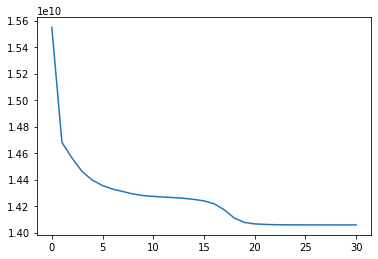

123456789101112131415161718192021222324252627282930313233343536

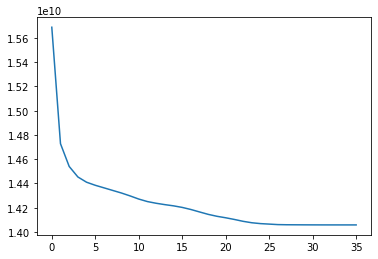

123456789101112131415

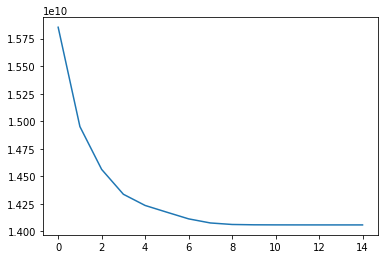

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263

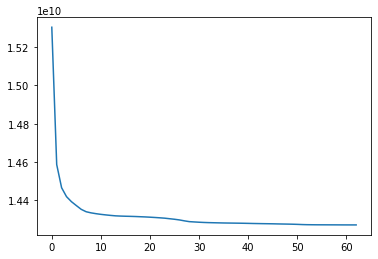

123456789101112131415161718192021

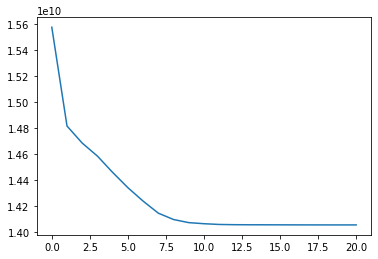

1234567891011121314151617181920212223242526272829303132333435363738394041424344

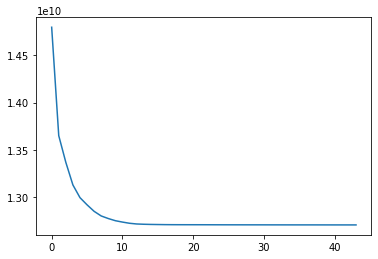

12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758

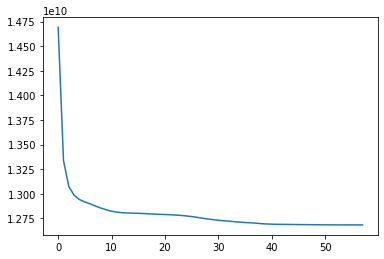

12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152

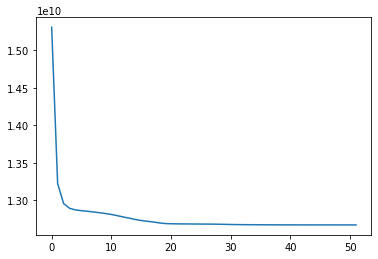

12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849

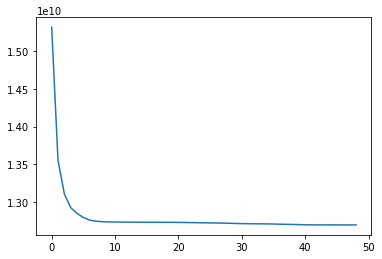

12345678910111213141516171819202122232425262728293031323334353637383940

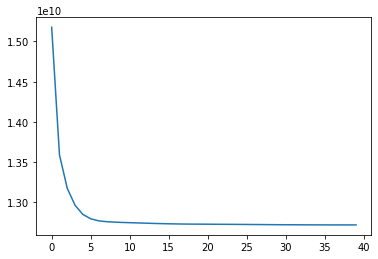

1234567891011121314151617181920212223242526272829303132

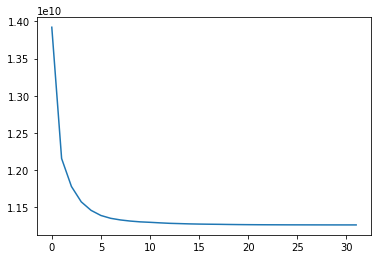

123456789101112131415161718192021222324252627282930313233343536373839404142

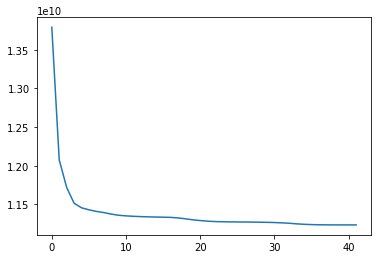

12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970

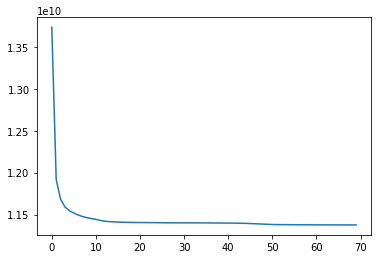

123456789101112131415161718192021222324252627282930313233343536373839404142

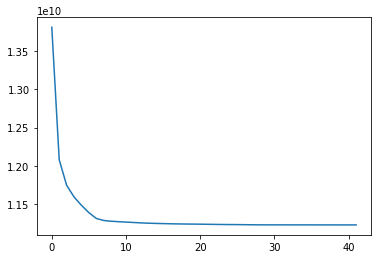

1234567891011121314151617181920212223242526272829303132

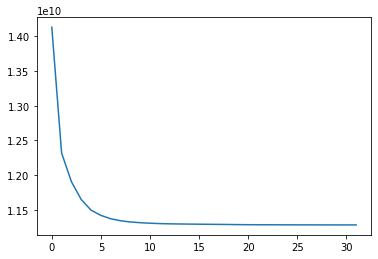

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

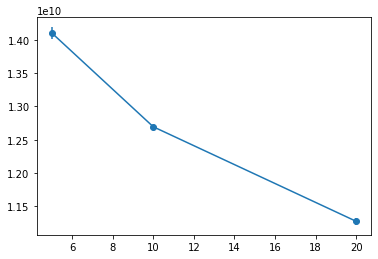

In [3]:
model_rssRun=[[model.fit(large_dataset) for i in range(5)] for model in kmeans_models]


plt.errorbar([5,10,20], [np.mean(model) for model in model_rssRun], yerr=[np.std(model) for model in model_rssRun], fmt='-o')

In [ ]:
# This is how to plot an image. We ask that any images in your writeup be grayscale images, just as in this example.

fig = plt.figure()
KMeansClassifier = KMeans(10)
idx=1
for row in range(5):
    KMeansClassifier.fit(large_dataset)
    for column,centroid in enumerate(KMeansClassifier.centroids):
        ax = fig.add_subplot(10, 5, idx)
        idx+=1
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
fig.show()
fig.savefig('test.png')

In [ ]:
standardized_data=np.empty((large_dataset.shape[0],large_dataset.shape[1]))
for pixel in range(large_dataset.shape[1]):
    mean=np.mean(large_dataset[:,pixel])
    std=np.std(large_dataset[:,pixel])
    for i,pic in enumerate(large_dataset):
        if std!=0:
            standardized_data[i,pixel]=(pic[pixel]-mean)/std
        else: 
            standardized_data[i,pixel]=(pic[pixel]-mean)


In [ ]:
fig = plt.figure()
KMeansClassifier = KMeans(10)
idx=1
for row in range(5):
    KMeansClassifier.fit(standardized_data)
    for column,centroid in enumerate(KMeansClassifier.centroids):
        ax = fig.add_subplot(10, 5, idx)
        idx+=1
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
fig.show()
fig.savefig('StandardizedData.png')

## HAC

In [40]:
from scipy.spatial import distance

class HAC(object):
    def __init__(self, linkage):
        self.linkage = linkage
    def fit(self,X):
        self.X=X
        clusters_matrix=distance.cdist(self.X,self.X)
        self.hac_dict={len(clusters_matrix):[[datum] for datum in self.X]}
        while len(clusters_matrix)!=10:
            min_value,cluster_one, cluster_two=float('inf'),-1,-1
            for i,cluster in enumerate(clusters_matrix):
                for j,other_cluster in enumerate(clusters_matrix):
                    if i!=j:
                        min_value=min(clusters_matrix[i,j],min_value)
                        cluster_one,cluster_two=i,j
                    
            new_cluster=[]
            for i,cluster in enumerate(clusters_matrix):
                if i!=cluster_one and i!=cluster_two:
                    if self.linkage=='min':
                        new_cluster.append(min(clusters_matrix[cluster_one,i],clusters_matrix[cluster_two,i]))
                    elif self.linkage=='max':
                        new_cluster.append(max(clusters_matrix[cluster_one,i],clusters_matrix[cluster_two,i]))
                    if self.linkage=='centroid':
                        new_cluster.append((clusters_matrix[cluster_one,i]+clusters_matrix[cluster_two,i])/2)            
            max_cluster=max(cluster_one,cluster_two)
            min_cluster=min(cluster_one,cluster_two)
            clusters_matrix=np.delete(clusters_matrix, max_cluster, axis=0)
            clusters_matrix=np.delete(clusters_matrix, max_cluster, axis=1)
            clusters_matrix=np.delete(clusters_matrix, min_cluster, axis=0)
            clusters_matrix=np.delete(clusters_matrix, min_cluster, axis=1)            
            
            clusters_matrix=np.concatenate((clusters_matrix,np.array([new_cluster])),axis=0)
            new_cluster.append(0)
            new_cluster=np.array(new_cluster).reshape(len(new_cluster),1)
            clusters_matrix=np.concatenate((clusters_matrix,new_cluster),axis=1)
            print(len(clusters_matrix),end=' ')

            self.hac_dict[len(clusters_matrix)]=[cluster for i,cluster in enumerate(self.hac_dict[len(clusters_matrix)+1])
                                            if i!= cluster_one and i!=cluster_two]
            self.hac_dict[len(clusters_matrix)].append(self.hac_dict[len(clusters_matrix)+1][cluster_one]+
                                                 self.hac_dict[len(clusters_matrix)+1][cluster_two])

    def get_centroids(self,k):
        return [np.mean(cluster,axis=0) for cluster in self.hac_dict[k]]
        
small_dataset = np.load("data/small_dataset.npy")
small_labels = np.load("data/small_dataset_labels.npy").astype(int)

hac_models=[]
hac_models.append(HAC('min'))
hac_models.append(HAC('max'))
hac_models.append(HAC('centroid'))


299 298 297 296 295 294 293 292 291 290 289 288 287 286 285 284 283 282 281 280 279 278 277 276 275 274 273 272 271 270 269 268 267 266 265 264 263 262 261 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101 100 99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


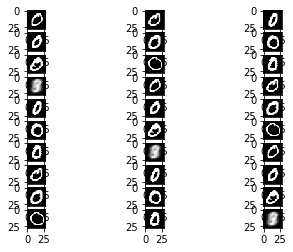

In [41]:
fig = plt.figure()
idx=1
for model in hac_models:
    model.fit(small_dataset)
    for centroid in model.get_centroids(10):
        ax=fig.add_subplot(10,3,idx)
        idx+=1
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
fig.show()
fig.savefig('HAC.png')